### Installing libraries

In [37]:
!pip install -r requirements.txt

### Importing libraries

In [38]:
import os
import pandas as pd
import numpy as np
import numpy.matrixlib as npmat
import networkx as nx
import matplotlib.pyplot as plt

### Helping functions

In [39]:
def csv_to_matrix(csv_file):
    """
    Returns a matrix from a csv file
    """
    return npmat.asmatrix(pd.read_csv(csv_file, header = None).to_numpy())

def matrix_to_graph(matrix):
    """
    Returns a network graph converted from a numpy matrix
    """
    if isinstance(matrix, npmat.matrix):
        return nx.from_numpy_array(matrix, create_using = nx.DiGraph())
    return matrix

def graph_to_matrix(G):
    """
    Returns a numpy matrix from a network graph
    """
    if isinstance(G, nx.Graph):
        return nx.to_numpy_matrix(G)
    return G

### Loading data

In [40]:
data_file = os.path.join(os.getcwd(), 'data.xlsx')

### 1. Python function converting an Excel file (.xls or .xlsx) to a .csv file.

In [41]:
def convert_excel_to_csv(excel_file):
    """
    Converts an excel file to csv file
    """
    df = pd.read_excel(excel_file, header = None)
    df.to_csv(excel_file.replace(excel_file.split('.')[-1],'csv'), header = None, index = False)

convert_excel_to_csv(data_file)

### 2. Python function for a graphical representation of the matrix using networkx and matplotlib.

In [42]:
matrix = csv_to_matrix(data_file.replace(data_file.split('.')[-1],'csv'))
matrix

matrix([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0]], dtype=int64)

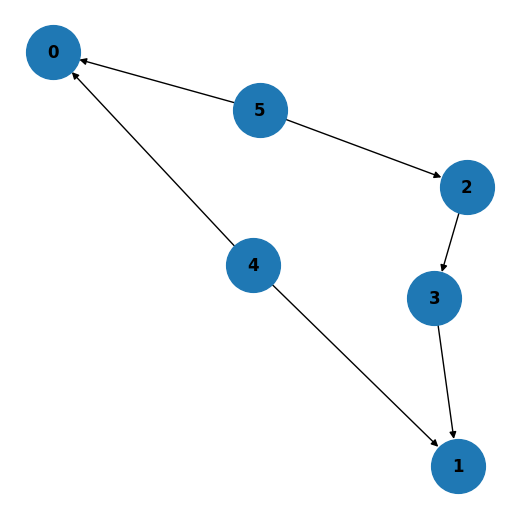

In [43]:
def visualize_binary_relation(my_matrix):
    """
    Plots the binary relation as a graph
    """
    if isinstance(my_matrix, npmat.matrix):
        n_rows, n_cols = my_matrix.shape
        if n_rows != n_cols:
            print('Binary relation is not of the form m x m')
            return
        elif n_rows < 3 or n_cols < 3 or n_rows > 20 or n_cols > 20:
            print('Binary relation matrix is not of the form m x m with 3 <= m <= 20')
            return
        visualize_graph = matrix_to_graph(my_matrix)
    plt.figure(figsize = (5,5)) 
    nx.draw(visualize_graph, with_labels = True, font_weight = "bold", node_size = 1500)
    plt.show()
                  
visualize_binary_relation(matrix)

### 3. Python function CompleteCheck testing if a binary relation is complete.

In [44]:
def CompleteCheck(matrix):
    """
    Checks if the binary relation is complete
    """
    n_row, n_col = matrix.shape
    for row in range(n_row):
        for col in range(n_col):
            if matrix[row,col] == 0 and matrix[col,row] == 0:
                print('Relation is not complete.')
                return False
    return True

CompleteCheck(matrix)

Relation is not complete.


False

### 4. Python function ReflexiveCheck testing if a binary relation is reflexive.

In [45]:
def ReflexiveCheck(matrix):
    """
    Checks if the binary relation is reflexive
    """
    if not (np.all(np.diagonal(matrix) == 1)):
        print('Relation is not reflexive.')
        return False
    return True
            
ReflexiveCheck(matrix)

Relation is not reflexive.


False

### 5. Python function AsymmetricCheck testing if a binary relation is asymmetric.

In [46]:
def AsymmetricCheck(matrix):
    """
    Checks if the binary relation is asymmetric
    """
    if np.any(matrix == matrix.transpose()):
        print('Relation is not asymmetric.')
        return False
    return True

AsymmetricCheck(matrix)

Relation is not asymmetric.


False

### 6. Python function SymmetricCheck testing if a binary relation is symmetric.

In [47]:
def SymmetricCheck(matrix):
    """
    Checks if the binary relation is symmetric
    """
    if not (np.all(matrix == matrix.transpose())):
        print('Relation is not symmetric.')
        return False
    return True

SymmetricCheck(matrix)

Relation is not symmetric.


False

### 7. Python function AntisymmetricCheck testing if a binary relation is antisymmetric.

In [48]:
def AntisymmetricCheck(matrix):
    """
    Checks if the binary relation is antisymmetric
    """
    n_row, n_col = matrix.shape
    for row in range(n_row):
        for col in range(n_col):
            if matrix[row,col] == 1 and matrix[col,row] == 1 and row != col:
                print('Relation is not antisymmetric.')
                return False
    return True

AntisymmetricCheck(matrix)

True

### 8. Python function TransitiveCheck testing if a binary relation is transitive.

In [49]:
def TransitiveCheck(matrix):
    """ 
    Checks if the binary relation is transitive
    """
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            for k in range(n_col):
                if matrix[i,j] == 1 and matrix[j,k] == 1 and matrix[i,k] != 1:
                    print('Relation is not transitive.')
                    return False
    return True

TransitiveCheck(matrix)

Relation is not transitive.


False

### 9. Python function NegativeTransitiveCheck testing if a binary relation is negative transitive.

In [50]:
def NegativeTransitiveCheck(matrix):
    """
    Checks if the binary relation is negative transitive
    """
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            for k in range(n_col):
                if matrix[i,j] == 0 and matrix[j,k] == 0 and matrix[i,k] == 1:
                    print('Relation is not negative transitive.')
                    return False
    return True

NegativeTransitiveCheck(matrix)

Relation is not negative transitive.


False

### 10. Python function CompleteOrderCheck testing if a binary relation is a total order.

In [51]:
def CompleteOrderCheck(matrix):
    """
    Checks if the binary relation is a total order
    """
    if not (CompleteCheck(matrix) and AntisymmetricCheck(matrix) and TransitiveCheck(matrix)):
        print('Relation is not a complete order.')
        return False
    return True

CompleteOrderCheck(matrix)

Relation is not complete.
Relation is not a complete order.


False

### 11. Python function CompletePreOrderCheck testing if a binary relation is a preorder.

In [52]:
def CompletePreOrderCheck(matrix):
    """
    Checks if the binary relation is a preorder
    """
    if not (CompleteCheck(matrix) and TransitiveCheck(matrix)):
        print('Relation is not a complete preorder.')
        return False
    return True

CompletePreOrderCheck(matrix)

Relation is not complete.
Relation is not a complete preorder.


False

### 12. Python function StrictRelation returning the asymmetric part of a binary relation.

In [53]:
def StrictRelation(matrix):
    """
    Returns the asymmetric part of a binary relation
    """
    output_matrix = matrix.copy()
    
    n_row, n_col = matrix.shape
    for row in range(n_row):
        for col in range(n_col):
            if matrix[row,col] == matrix[col,row] and matrix[row,col] == 1:
                output_matrix[row,col] = 0
                output_matrix[col,row] = 0  
    return output_matrix

StrictRelation(matrix)

matrix([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0]], dtype=int64)

### 13. Python function IndifferenceRelation returning the symmetric part of a binary relation.

In [54]:
def IndifferenceRelation(matrix):
    """
    Returns the symmetric part of a binary relation
    """
    output_matrix = np.zeros(matrix.shape, dtype = int)
    
    n_row, n_col = matrix.shape
    for row in range(n_row):
        for col in range(n_col):
            if matrix[row,col] == matrix[col,row] and matrix[row,col] == 1:
                output_matrix[row,col] = 1
                output_matrix[col,row] = 1  
    return output_matrix

IndifferenceRelation(matrix)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### 14. Python function Topologicalsorting returning a topological sorting of a given binary relation without cycles.

In [55]:
# Alternative way to check if the adjacency matrix has a cycle or not

# def DirectedAcyclicGraphCheck(matrix):
#     """
#     Checks if the binary relation is a DAG
#     """
#     n = matrix.shape[0]
#     for i in range(2, n+1):
#         exponent_matrix = np.linalg.matrix_power(matrix, i)
#         trace_value = np.trace(exponent_matrix)

#         if trace_value != 0:
#             print('Relation contains a cycle.')
#             return False
#     return True

In [56]:
# This code is inspired by the source - https://www.geeksforgeeks.org/detect-cycle-in-a-graph/

# from collections import deque
# def DirectedAcyclicGraphCheck(matrix):  
#     """
#     Checks if the binary relation is a DAG
#     """
#     n = matrix.shape[0]
#     indegree = [0] * n
#     q = deque()
#     visited = 0

#     for u in range(n):
#         for v in range(n):
#             if matrix[u,v]:
#                 indegree[v] += 1

#     for u in range(n):
#         if indegree[u] == 0:
#             q.append(u)

#     while q:
#         u = q.popleft()
#         visited += 1

#         for v in range(n):
#             indegree[v] -= 1
#             if indegree[v] == 0:
#                 q.append(v)

#     if visited != n:
#         return True
#     return False

# DirectedAcyclicGraphCheck(matrix)

In [57]:
# This code is inspired by the source - https://www.geeksforgeeks.org/topological-sorting-indegree-based-solution/

def Topologicalsorting(matrix): 
    """
    Returns the topological sorting of a binary relation without cycles
    """
    print(matrix)
    n = matrix.shape[0]
    indegree = [0] * n
    stack = []

    for u in range(n):
        for v in range(n):
            if matrix[u,v]:
                indegree[v] += 1

    for u in range(n):
        if indegree[u] == 0:
            stack.append(u)

    count = 0

    top_order = []

    while stack:
        u = stack.pop(0)
        top_order.append(u)

        for v in range(n):
            indegree[v] -= 1
            if indegree[v] == 0:
                stack.append(v)
        count += 1

    if count == n:
        return(top_order)
    else:
        print('Cannot have a topological sorting for this relation, since it has cycles.')
        return None

    
order = Topologicalsorting(matrix)
if order is not None:
    print('Topological sorting for this relation is:')
    print(' -> '.join(str(x) for x in order))

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]]
Topological sorting for this relation is:
4 -> 5 -> 2 -> 3 -> 0 -> 1


### 15. Creating test functions for the matrix:
Binary relation B on the set of X = {a, b, c, d, e, f}, which is defined as follows:

| | a | b | c | d | e | f |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| a | 1 | 1 | 1 | 1 | 1 | 1 |
| b | 0 | 1 | 1 | 1 | 1 | 1 |
| c | 0 | 0 | 1 | 1 | 1 | 1 |
| d | 0 | 1 | 1 | 1 | 1 | 0 |
| e | 0 | 0 | 0 | 1 | 1 | 1 |
| f | 0 | 0 | 0 | 0 | 1 | 1 |

In [58]:
matrix = np.matrix([[1, 1, 1, 1, 1, 1],
         [0, 1, 1, 1, 1, 1],
         [0, 0, 1, 1, 1, 1],
         [0, 1, 1, 1, 1, 0],
         [0, 0, 0, 1, 1, 1],
         [0, 0, 0, 0, 1, 1]])

In [59]:
if CompleteCheck(matrix):
    print('Relation is complete.')

Relation is not complete.


In [60]:
if ReflexiveCheck(matrix):
    print('Relation is reflexive.')

Relation is reflexive.


In [61]:
if AsymmetricCheck(matrix):
    print('Relation is asymmetric.')

Relation is not asymmetric.


In [62]:
if SymmetricCheck(matrix):
    print('Relation is symmetric.')

Relation is not symmetric.


In [63]:
if AntisymmetricCheck(matrix):
    print('Relation is antisymmetric.')

Relation is not antisymmetric.


In [64]:
if TransitiveCheck(matrix):
    print('Relation is transitive.')

Relation is not transitive.


In [65]:
if NegativeTransitiveCheck(matrix):
    print('Relation is negative transitive.')

Relation is not negative transitive.


In [66]:
if CompleteOrderCheck(matrix):
    print('Relation is a complete order.')

Relation is not complete.
Relation is not a complete order.


In [67]:
if CompletePreOrderCheck(matrix):
    print('Relation is a complete preorder.')

Relation is not complete.
Relation is not a complete preorder.


In [68]:
print('Asymmetric part of the relation B is:')
print(StrictRelation(matrix))

Asymmetric part of the relation B is:
[[0 1 1 1 1 1]
 [0 0 1 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [69]:
print('Symmetric part of the relation B is:')
print(IndifferenceRelation(matrix))

Symmetric part of the relation B is:
[[1 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 1 1 1 1 0]
 [0 0 0 1 1 1]
 [0 0 0 0 1 1]]


In [70]:
print(f'Topological sorting of the relation B is: '+ str(Topologicalsorting(matrix)))

[[1 1 1 1 1 1]
 [0 1 1 1 1 1]
 [0 0 1 1 1 1]
 [0 1 1 1 1 0]
 [0 0 0 1 1 1]
 [0 0 0 0 1 1]]
Cannot have a topological sorting for this relation, since it has cycles.
Topological sorting of the relation B is: None
